# Data Collecting

In [62]:
!pip install kaggle

In [63]:
from google.colab import files
files.upload()

{}

In [64]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [65]:
!kaggle datasets download -d yasserh/housing-prices-dataset

housing-prices-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [66]:
!mkdir data
!unzip housing-prices-dataset.zip -d data
!ls data

mkdir: cannot create directory ‘data’: File exists
Archive:  housing-prices-dataset.zip
replace data/Housing.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
Housing.csv


# Data Understanding

In [67]:
import pandas as pd

df = pd.read_csv('data/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [69]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [70]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Data Visualization

Correlation of price with other features

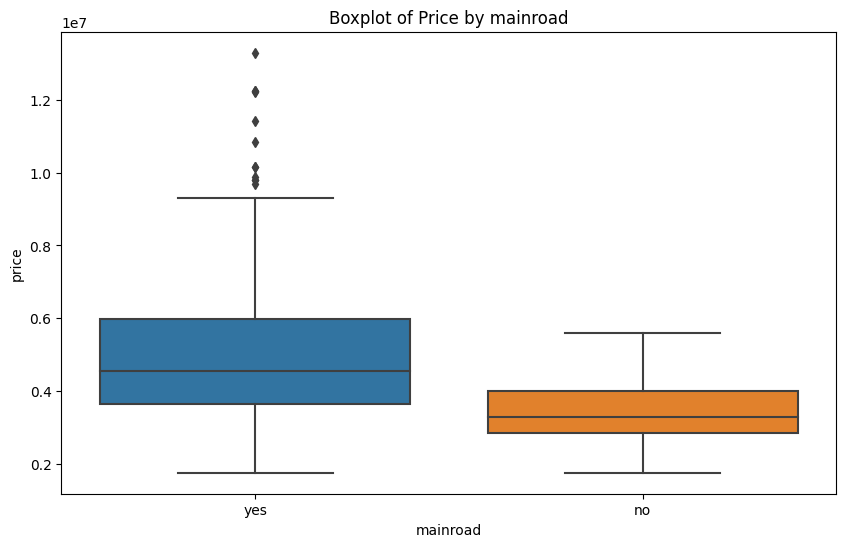

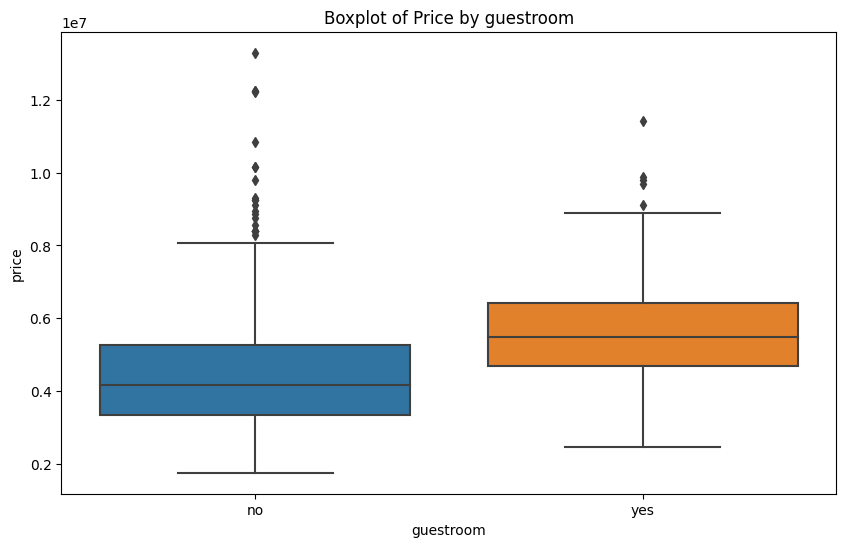

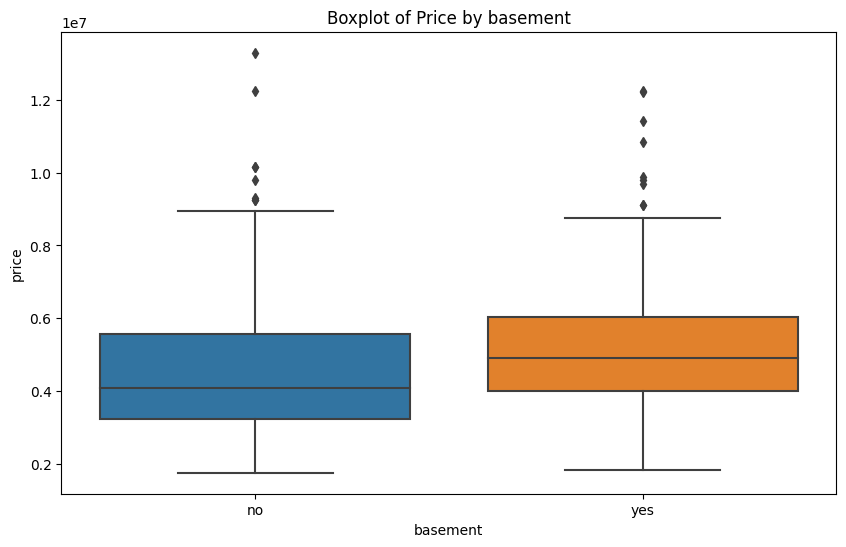

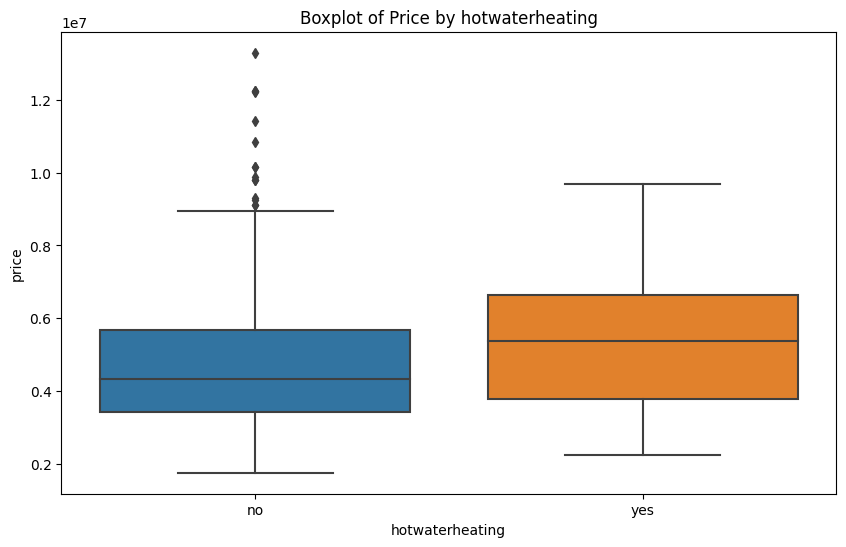

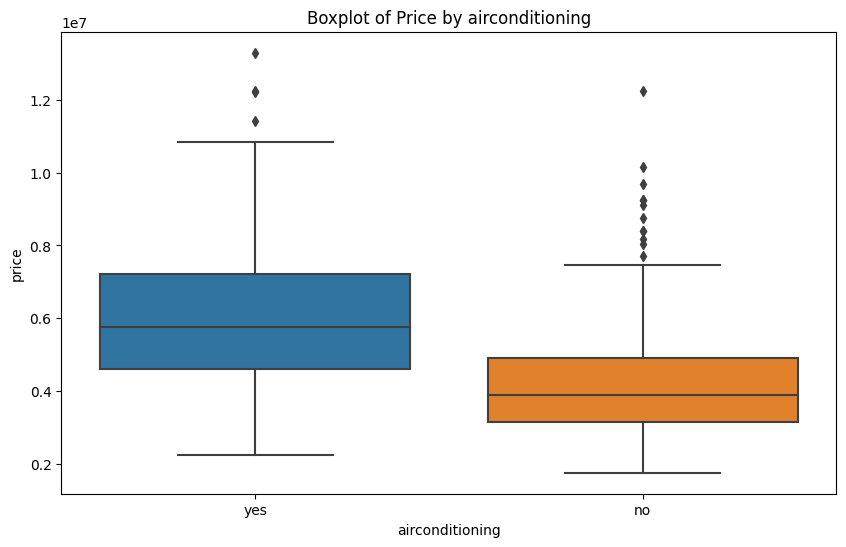

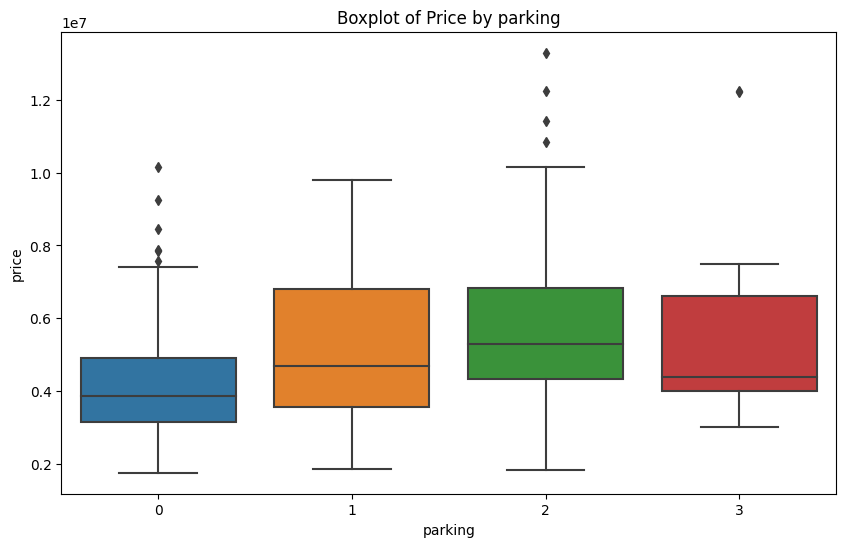

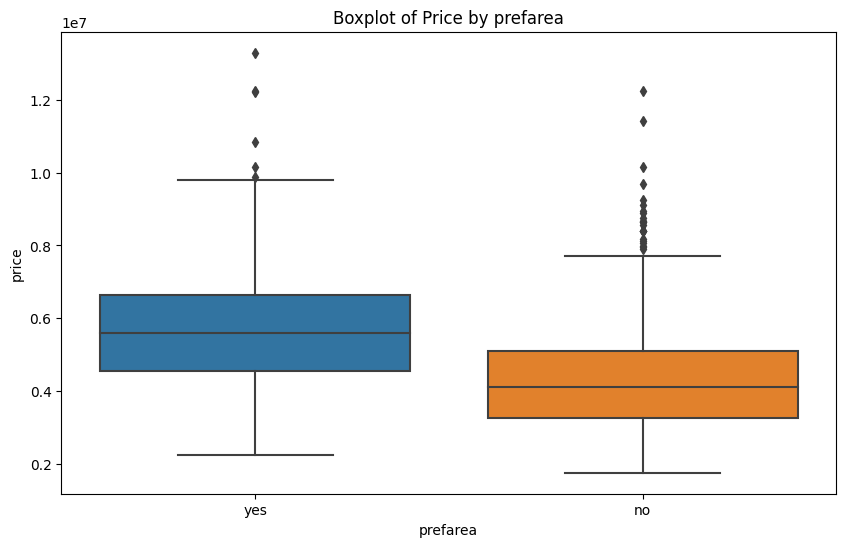

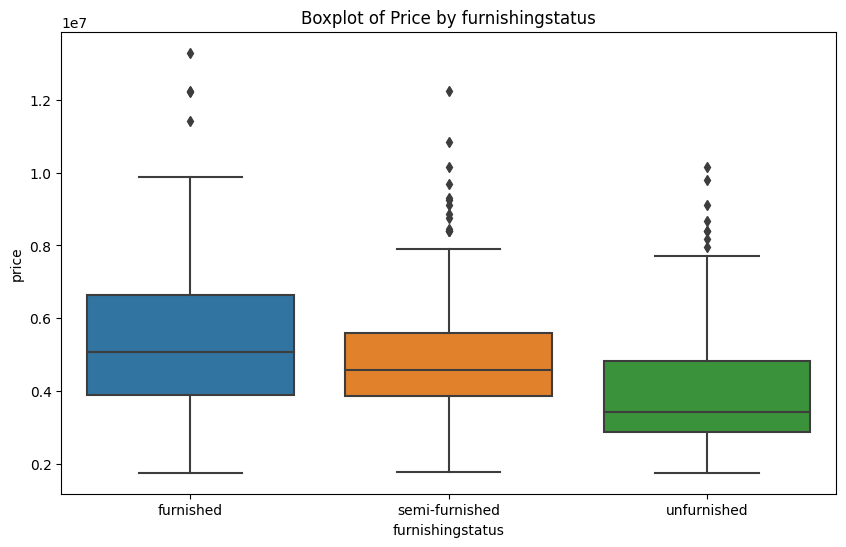

In [71]:
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='price', data=df)
    plt.title(f'Boxplot of Price by {var}')
    plt.show()


Correlation Matrix > Price highest correlation with area

<ipython-input-72-88d6b65bb6b7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


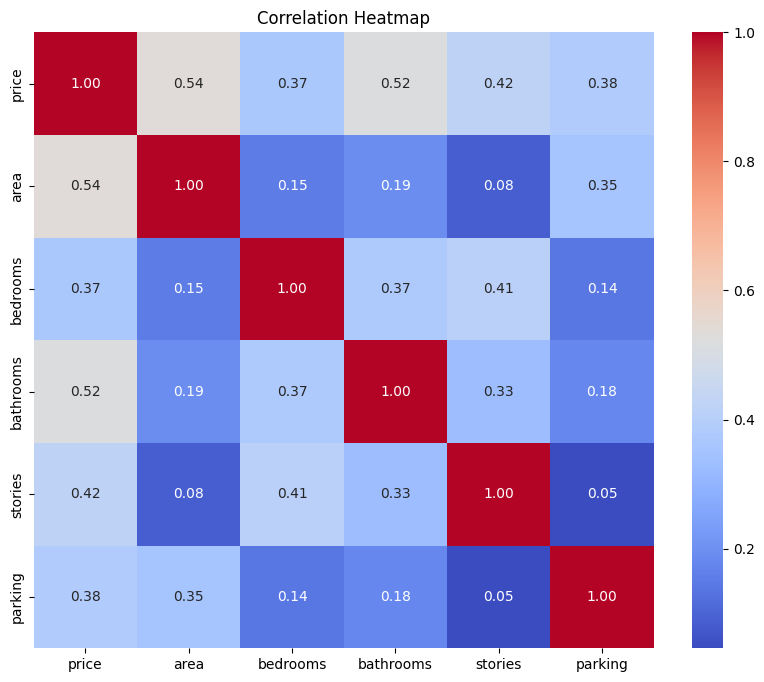

In [72]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Violin Plot Prices with Stories

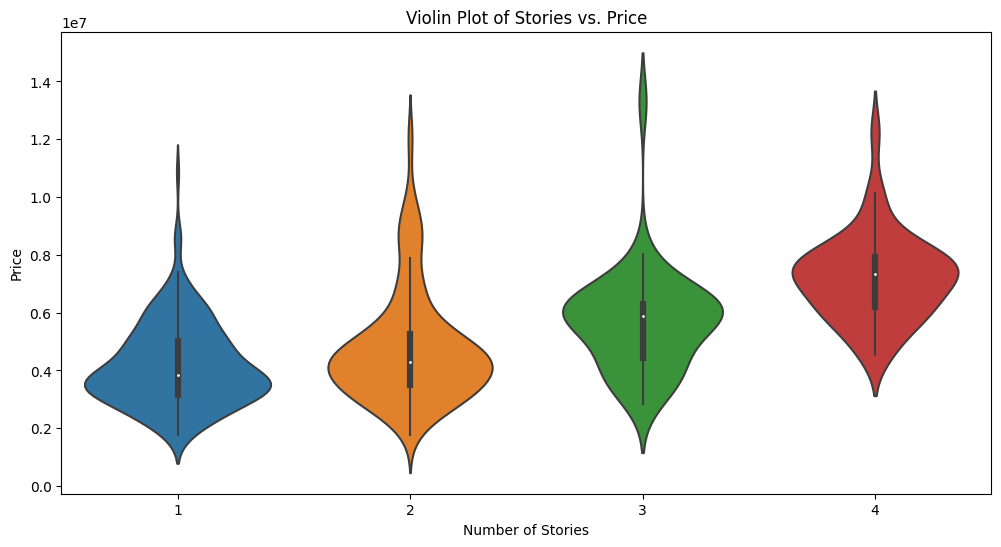

In [73]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='stories', y='price', data=df)
plt.title('Violin Plot of Stories vs. Price')
plt.xlabel('Number of Stories')
plt.ylabel('Price')
plt.show()


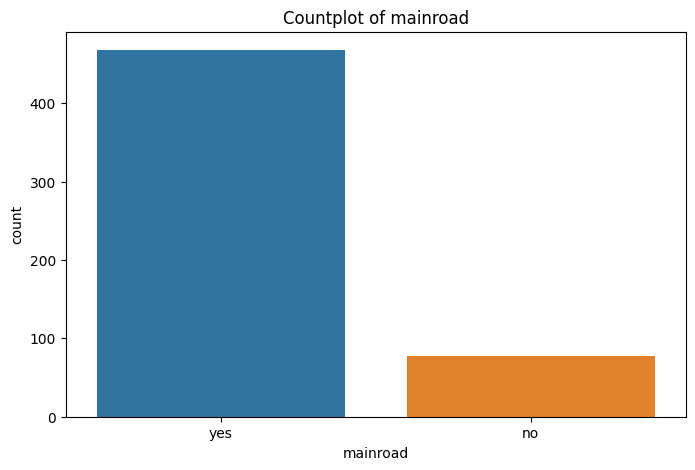

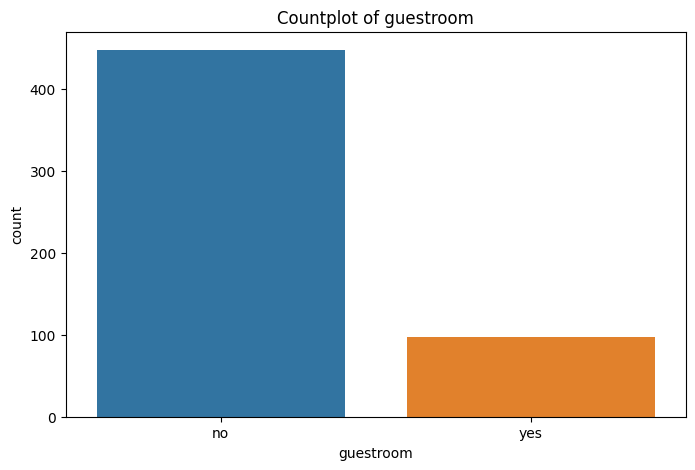

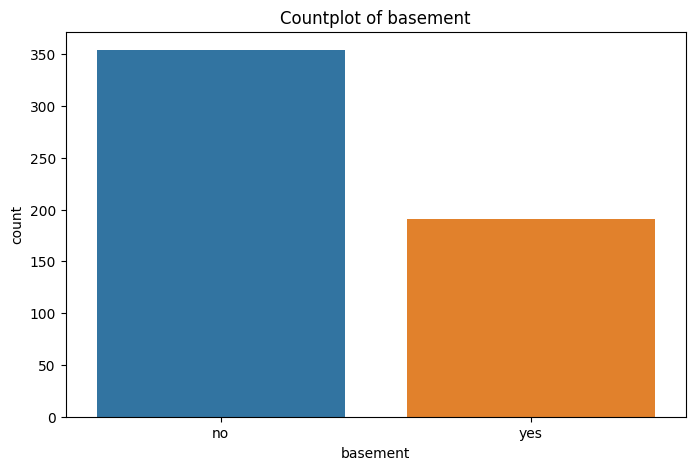

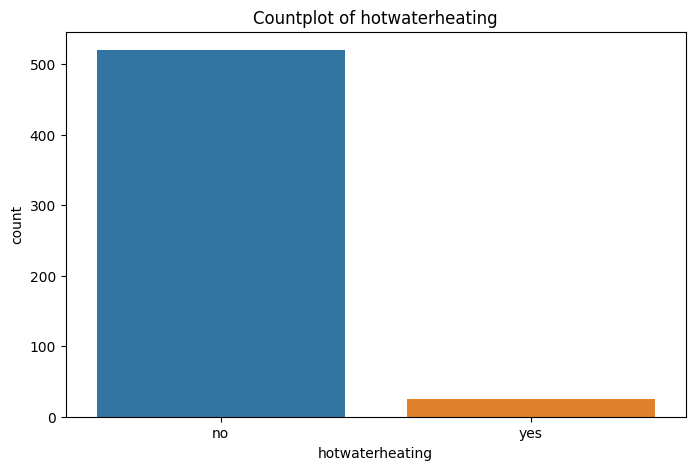

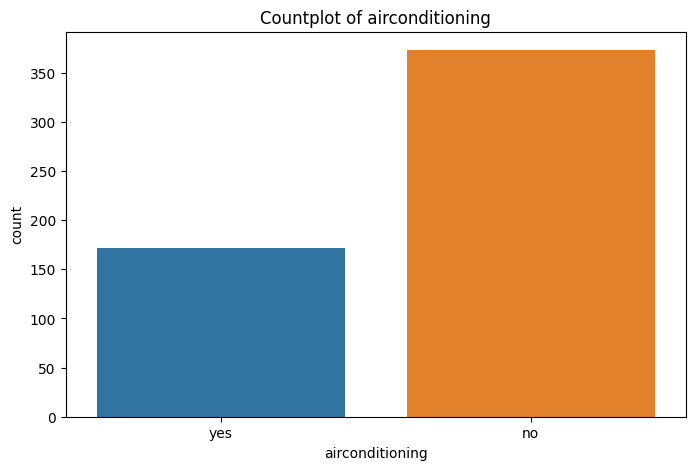

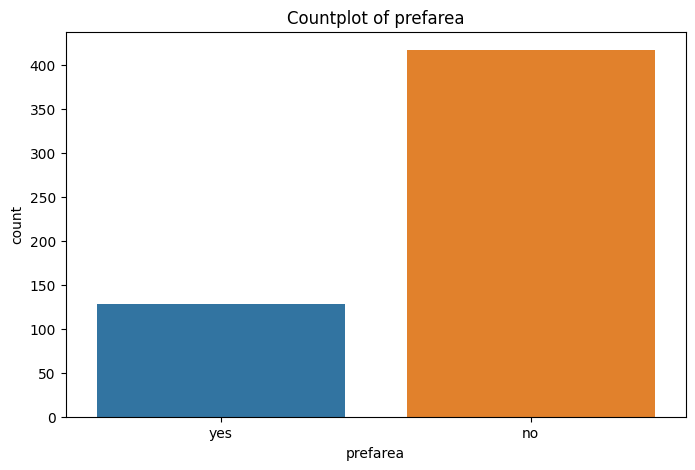

In [74]:
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for var in binary_vars:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=var, data=df)
    plt.title(f'Countplot of {var}')
    plt.show()


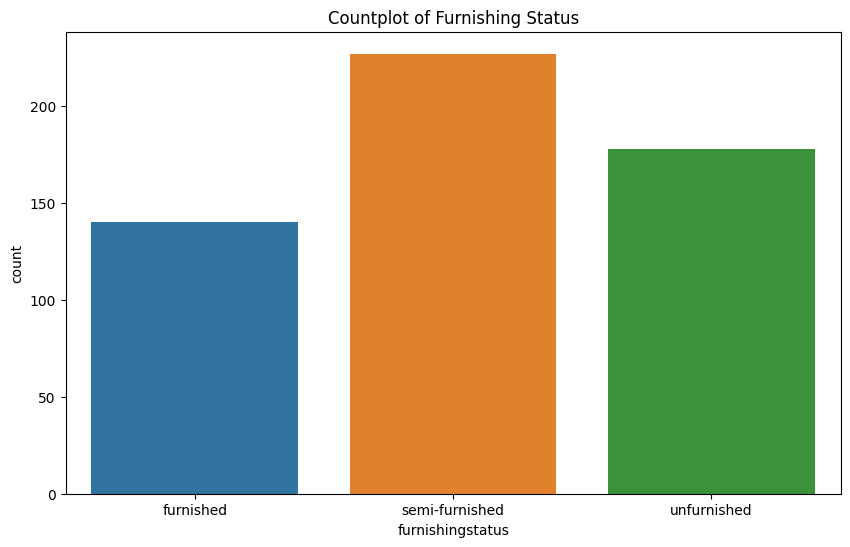

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(x='furnishingstatus', data=df)
plt.title('Countplot of Furnishing Status')
plt.show()


Price Distribution

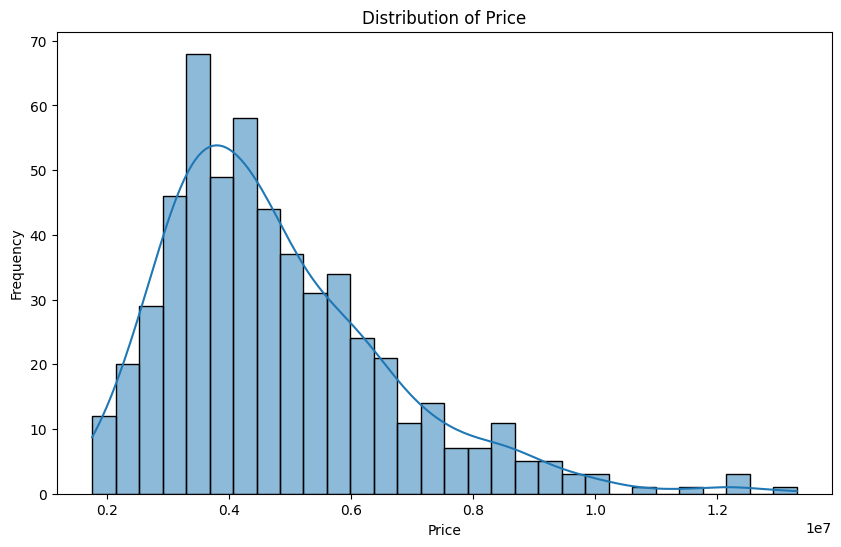

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Scatterplot between area and price

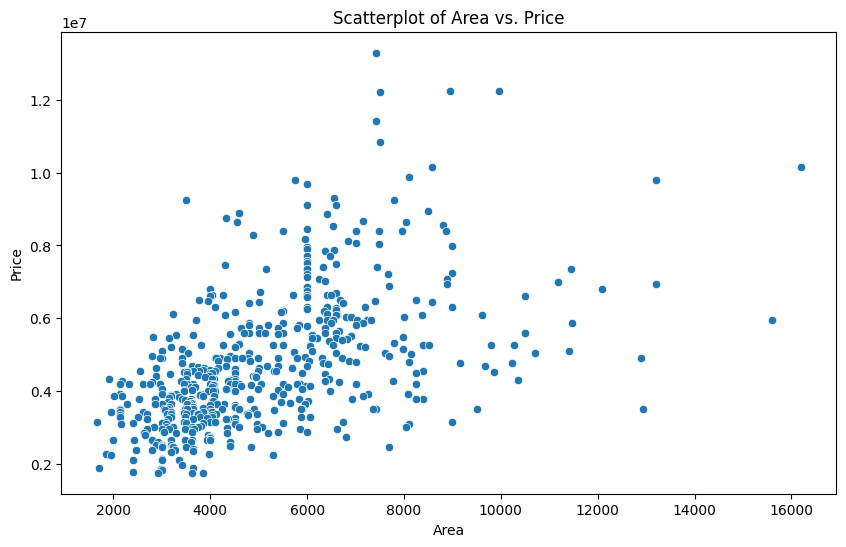

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Scatterplot of Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()


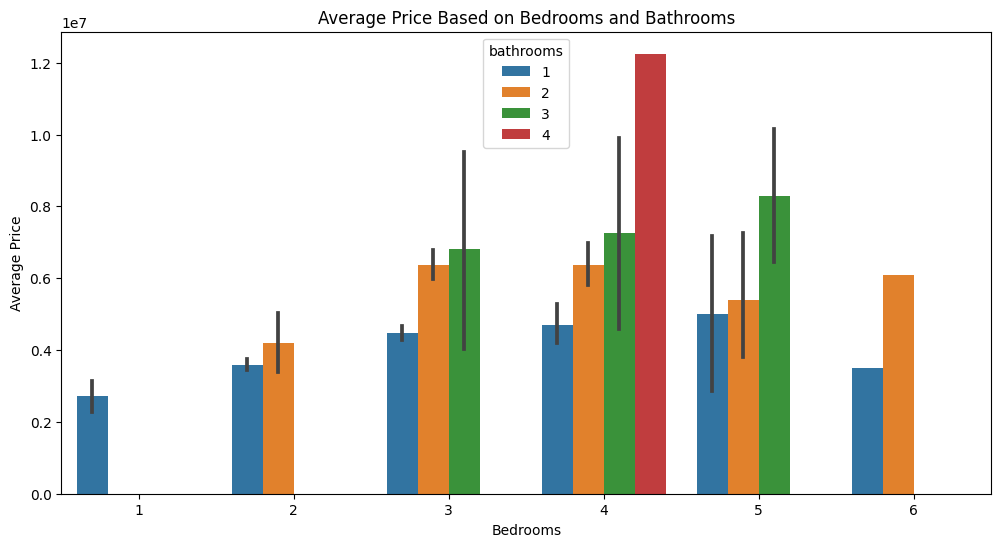

In [78]:
plt.figure(figsize=(12, 6))
sns.barplot(x='bedrooms', y='price', hue='bathrooms', data=df)
plt.title('Average Price Based on Bedrooms and Bathrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Average Price')
plt.show()


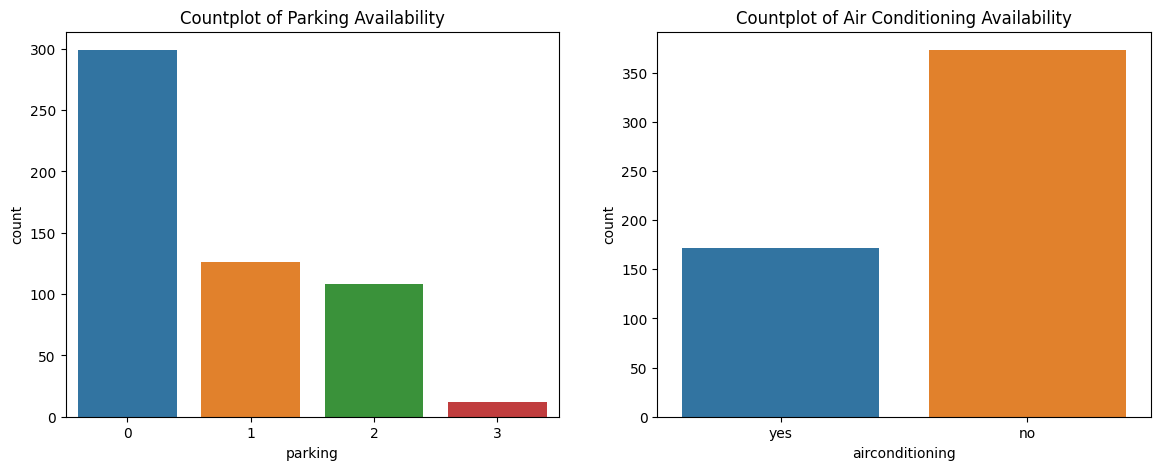

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='parking', data=df, ax=axes[0])
axes[0].set_title('Countplot of Parking Availability')

sns.countplot(x='airconditioning', data=df, ax=axes[1])
axes[1].set_title('Countplot of Air Conditioning Availability')

plt.show()


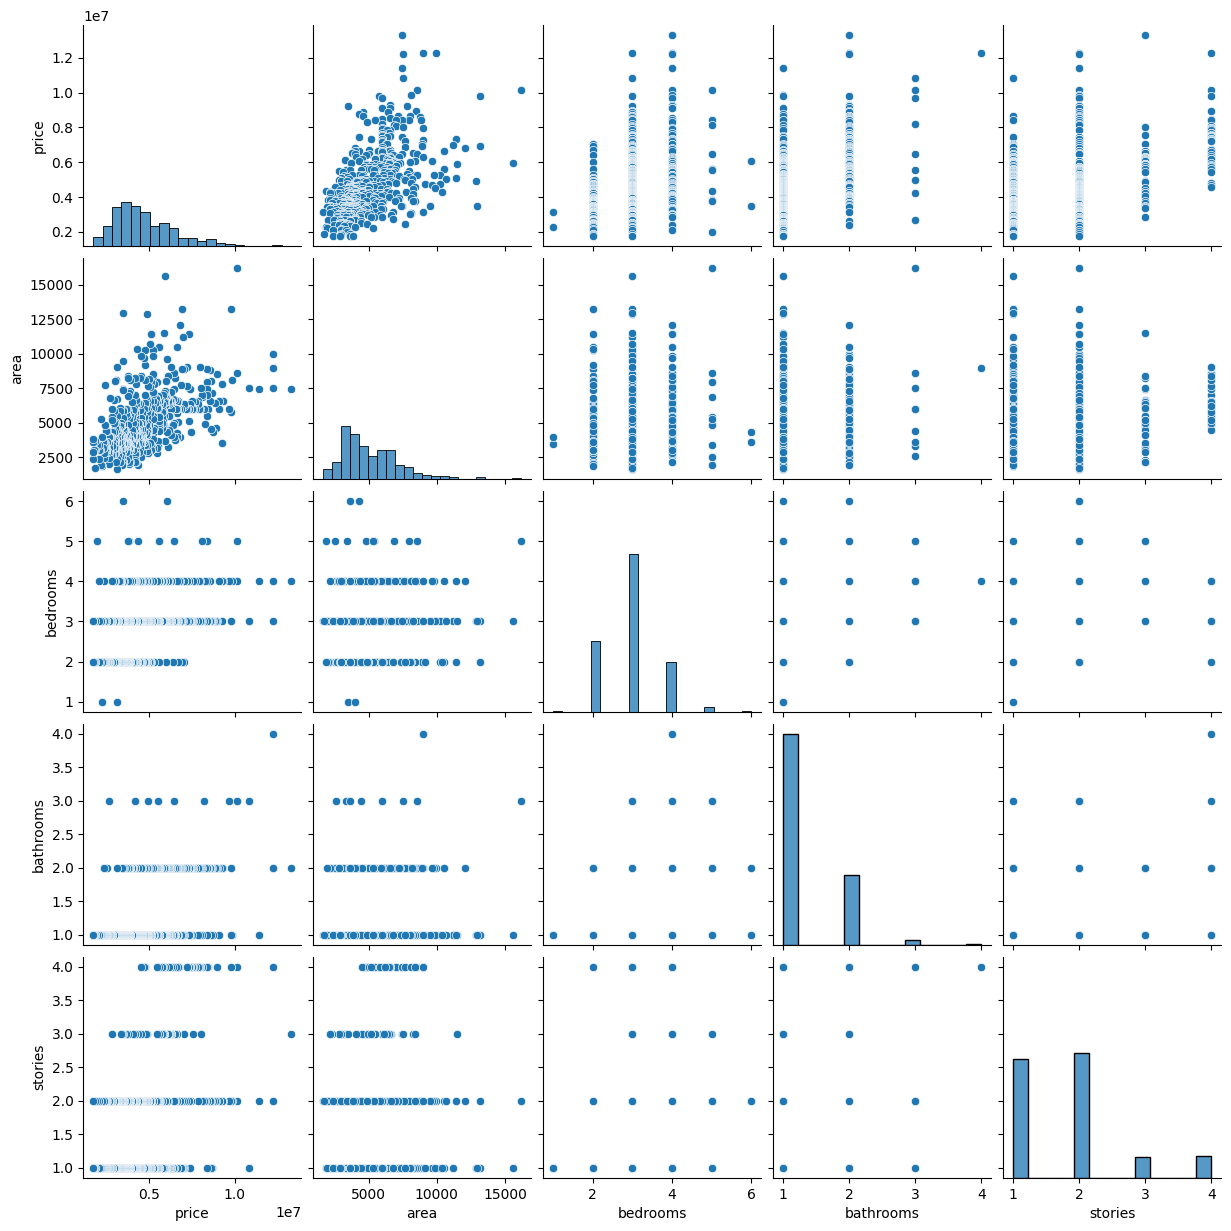

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']
sns.pairplot(df[numeric_vars])
plt.show()


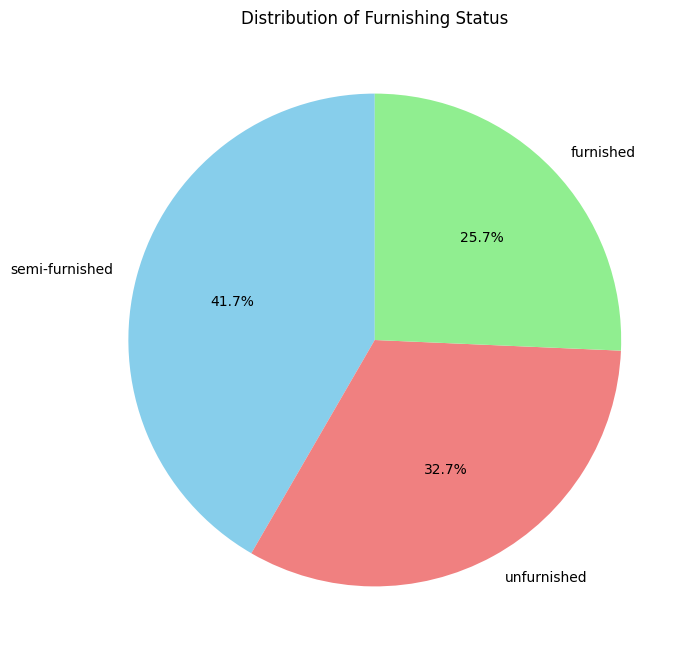

In [81]:
import matplotlib.pyplot as plt

furnishing_counts = df['furnishingstatus'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(furnishing_counts, labels=furnishing_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Furnishing Status')
plt.show()


# Remove Outlier Data

In [82]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


outliers = (df['price'] < Q1 - 1.5 * IQR) | (df['price'] > Q3 + 1.5 * IQR)


df_cleaned = df[~outliers]


print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)


Original DataFrame shape: (545, 13)
Cleaned DataFrame shape: (530, 13)


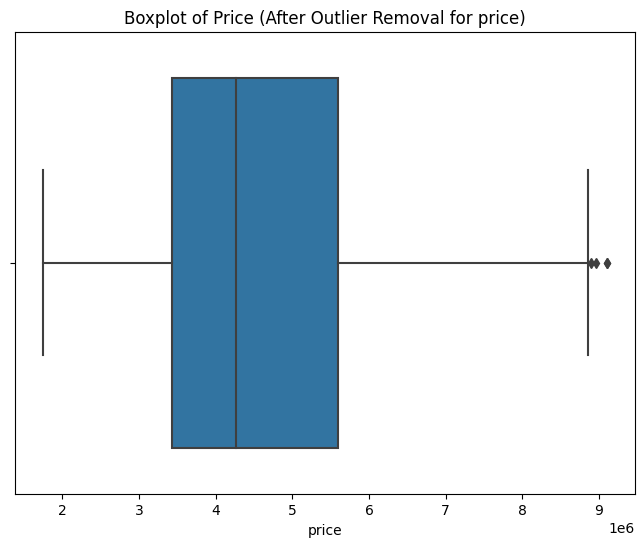

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned['price'])
plt.title('Boxplot of Price (After Outlier Removal for price)')
plt.show()


In [84]:

Q1_area = df_cleaned['area'].quantile(0.25)
Q3_area = df_cleaned['area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

outliers_area = (df_cleaned['area'] < Q1_area - 1.5 * IQR_area) | (df_cleaned['area'] > Q3_area + 1.5 * IQR_area)


df_cleaned_area = df_cleaned[~outliers_area]


print("Original DataFrame shape:", df_cleaned.shape)
print("Cleaned DataFrame shape (based on 'area'):", df_cleaned_area.shape)


Original DataFrame shape: (530, 13)
Cleaned DataFrame shape (based on 'area'): (517, 13)


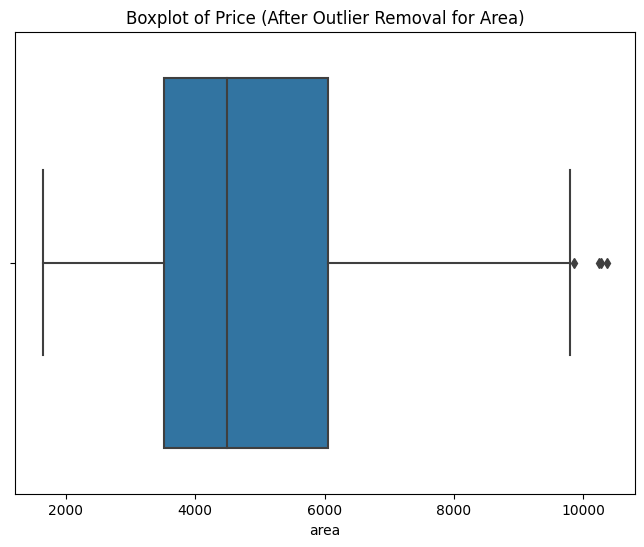

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned_area['area'])
plt.title('Boxplot of Price (After Outlier Removal for Area)')
plt.show()


In [86]:
df_cleaned_area

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Cat Plot

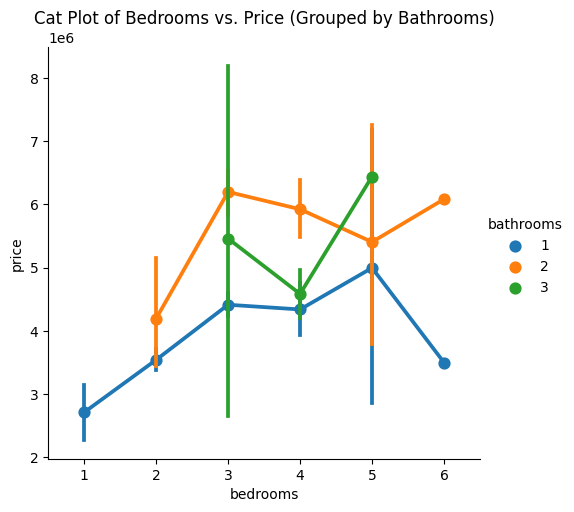

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt


selected_columns = ['bedrooms', 'bathrooms', 'price']
df_subset = df_cleaned_area[selected_columns]

sns.catplot(x='bedrooms', y='price', hue='bathrooms', data=df_subset, kind='point')
plt.title('Cat Plot of Bedrooms vs. Price (Grouped by Bathrooms)')
plt.show()


<Figure size 1500x500 with 0 Axes>

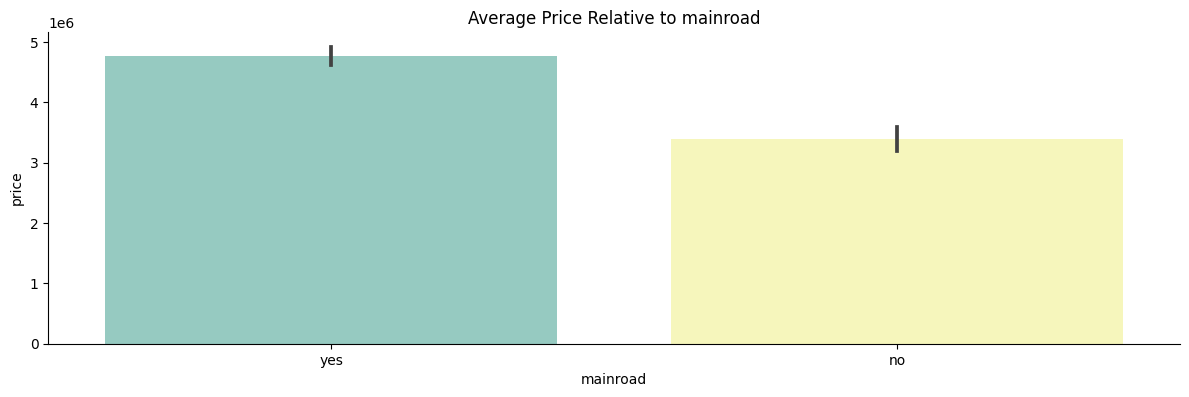

<Figure size 1500x500 with 0 Axes>

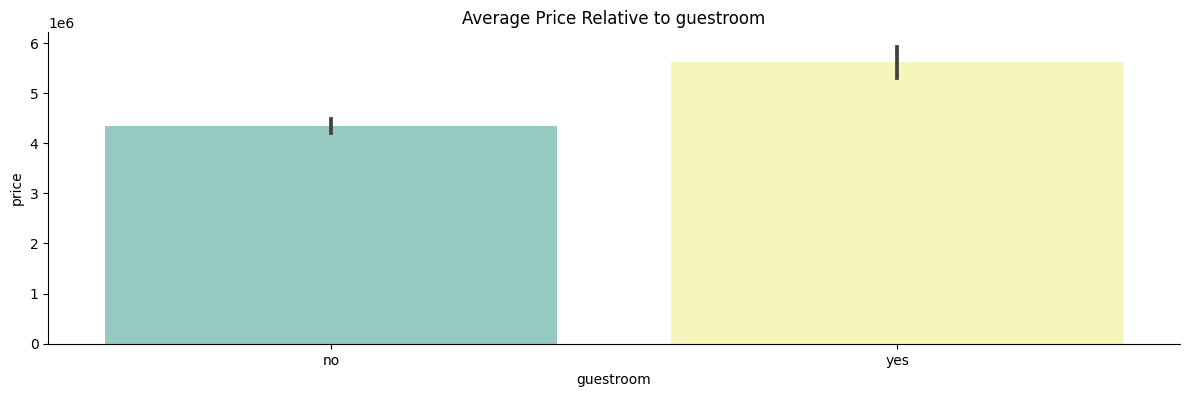

<Figure size 1500x500 with 0 Axes>

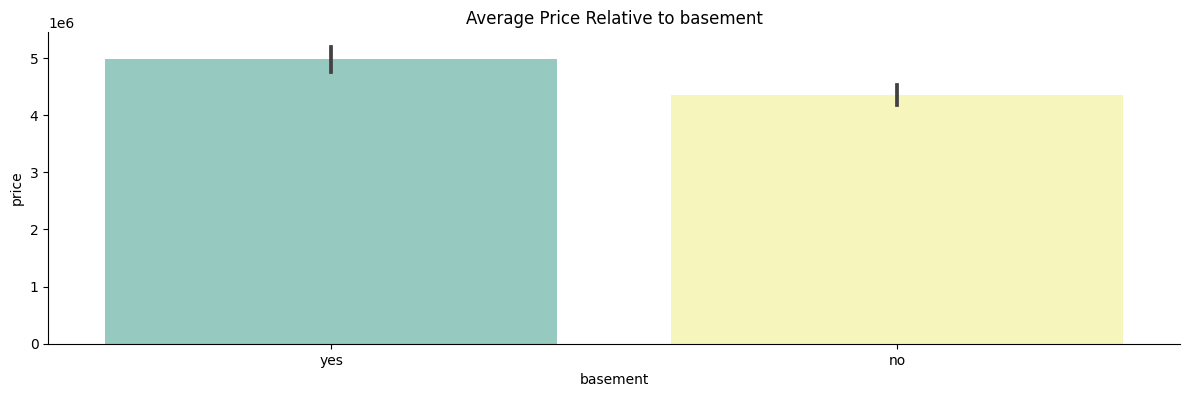

<Figure size 1500x500 with 0 Axes>

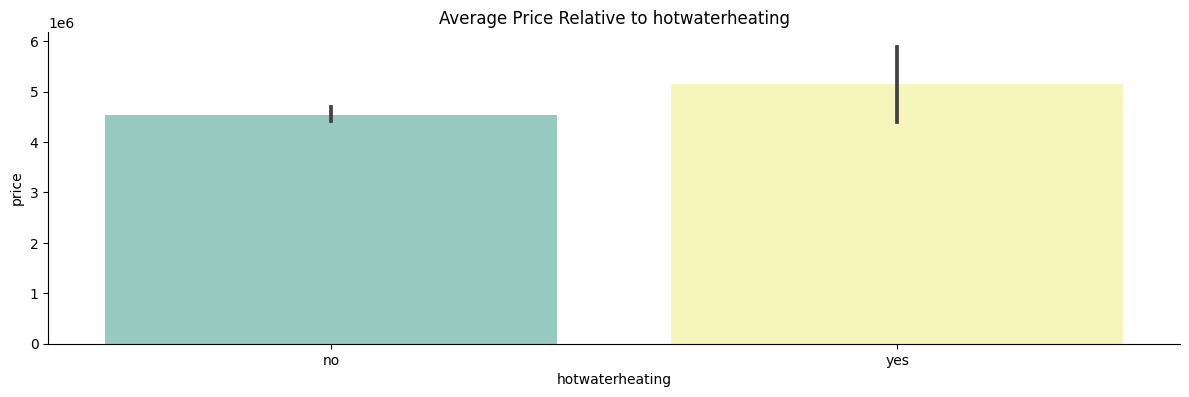

<Figure size 1500x500 with 0 Axes>

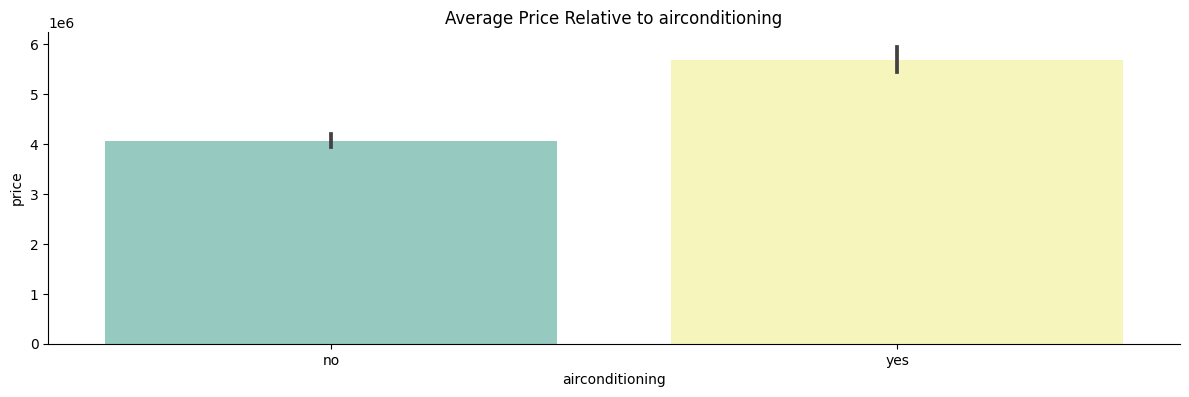

<Figure size 1500x500 with 0 Axes>

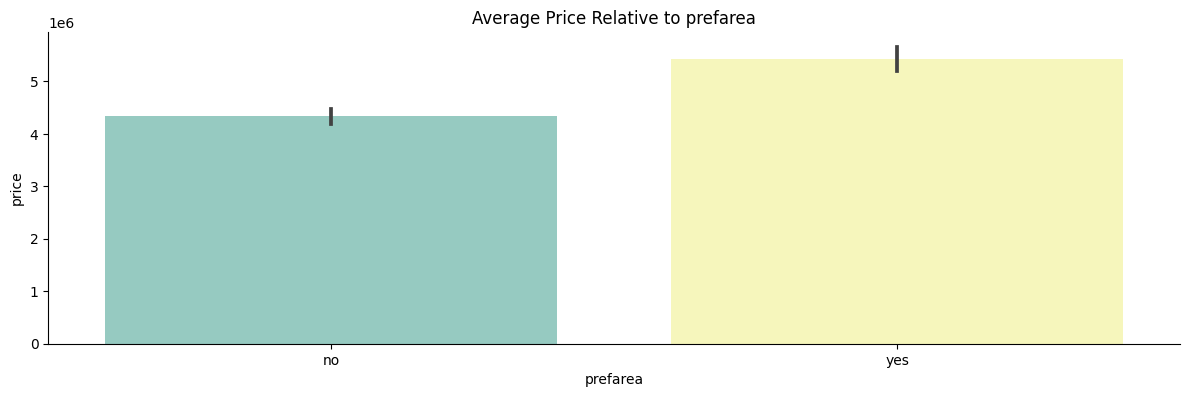

<Figure size 1500x500 with 0 Axes>

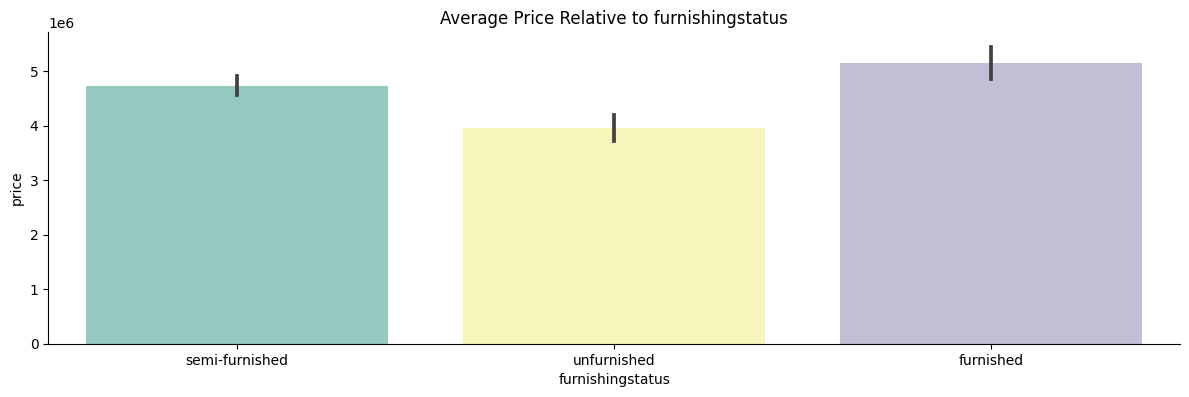

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt


cat_features = df_cleaned_area.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    plt.figure(figsize=(15, 5))
    sns.catplot(x=col, y="price", kind="bar", dodge=False, height=4, aspect=3, data=df_cleaned_area, palette="Set3")
    plt.title("Average Price Relative to {}".format(col))
    plt.show()

# Data Preparation

## One Hot Encoding

In [89]:

cat_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

df_encoded = pd.get_dummies(df_cleaned_area, columns=cat_columns, drop_first=True)

df_encoded


,price,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,0,1,0,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,0,0,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,0,1,0,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,0,1,0,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0,0,0


## Data Normalization

In [96]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_list = ["area", "bedrooms", "price"]
df_encoded[numerical_list] = scaler.fit_transform(df_encoded[numerical_list])
df_encoded

,price,area,bedrooms,bathrooms,stories,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,1.000000,0.499426,0.6,1,2,1,0,1,0,0,0,1,0,0,1,0
16,1.000000,0.568312,0.6,2,2,1,1,1,0,1,1,0,0,1,0,1
17,0.980952,0.786452,0.4,2,4,1,0,0,0,1,0,1,0,0,0,0
18,0.971429,0.338691,0.4,2,2,1,1,0,0,1,0,1,0,0,0,0
19,0.966667,0.547646,0.4,2,2,1,0,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.009524,0.154994,0.2,1,1,1,0,1,0,0,0,1,0,0,0,1
541,0.002333,0.086108,0.4,1,1,0,0,0,0,0,0,0,0,0,1,0
542,0.000000,0.226177,0.2,1,1,1,0,0,0,0,0,0,0,0,0,1
543,0.000000,0.144661,0.4,1,1,0,0,0,0,0,0,0,0,0,0,0


## Split the Data

In [97]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

X = df_encoded.drop(["price"],axis =1)
y = df_encoded["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=123)

In [98]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 517
Total # of sample in train dataset: 413
Total # of sample in test dataset: 104


# Modeling

## Grid Search CV

In [126]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit


X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

cv = ShuffleSplit(n_splits=5, test_size=0.05, random_state=123)

algos = {
    'Linear Regression': {'model': LinearRegression(), 'params': {}},
    'Random Forest': {'model': RandomForestRegressor(), 'params': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}},
    'Gradient Boosting': {'model': GradientBoostingRegressor(), 'params': {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}}
}

scores = []

for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X, y)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

results_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

results_df

,model,best_score,best_params
0,Linear Regression,0.696927,{}
1,Random Forest,0.675772,"{'max_depth': 10, 'n_estimators': 150}"
2,Gradient Boosting,0.672297,"{'learning_rate': 0.1, 'n_estimators': 150}"


## Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

# Linear Regression
linear_reg_params = {}
linear_reg_model = LinearRegression(**linear_reg_params)
linear_reg_model.fit(X, y)
linear_reg_model.score(X_test, y_test)


0.7142678671838294

## Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest
random_forest_params = {'max_depth': 20, 'n_estimators': 50}
random_forest_model = RandomForestRegressor(**random_forest_params)
random_forest_model.fit(X, y)
random_forest_model.score(X_test, y_test)


0.9494914794916384

## Gradient Boosting

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting
gradient_boosting_params = {'learning_rate': 0.1, 'n_estimators': 100}
gradient_boosting_model = GradientBoostingRegressor(**gradient_boosting_params)
gradient_boosting_model.fit(X, y)
gradient_boosting_model.score(X_test, y_test)

0.8507240875460411

## Evaluation the Model

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


linear_reg_predictions = linear_reg_model.predict(X)
random_forest_predictions = random_forest_model.predict(X)
gradient_boosting_predictions = gradient_boosting_model.predict(X)

mse_linear_reg = mean_squared_error(y, linear_reg_predictions)
mse_random_forest = mean_squared_error(y, random_forest_predictions)
mse_gradient_boosting = mean_squared_error(y, gradient_boosting_predictions)

mae_linear_reg = mean_absolute_error(y, linear_reg_predictions)
mae_random_forest = mean_absolute_error(y, random_forest_predictions)
mae_gradient_boosting = mean_absolute_error(y, gradient_boosting_predictions)

r2_linear_reg = r2_score(y, linear_reg_predictions)
r2_random_forest = r2_score(y, random_forest_predictions)
r2_gradient_boosting = r2_score(y, gradient_boosting_predictions)

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_linear_reg, mse_random_forest, mse_gradient_boosting],
    'MAE': [mae_linear_reg, mae_random_forest, mae_gradient_boosting],
    'R-squared': [r2_linear_reg, r2_random_forest, r2_gradient_boosting]
})

results


,Model,MSE,MAE,R-squared
0,Linear Regression,0.015291,0.094039,0.674593
1,Random Forest,0.002743,0.037614,0.941625
2,Gradient Boosting,0.007734,0.065887,0.835422


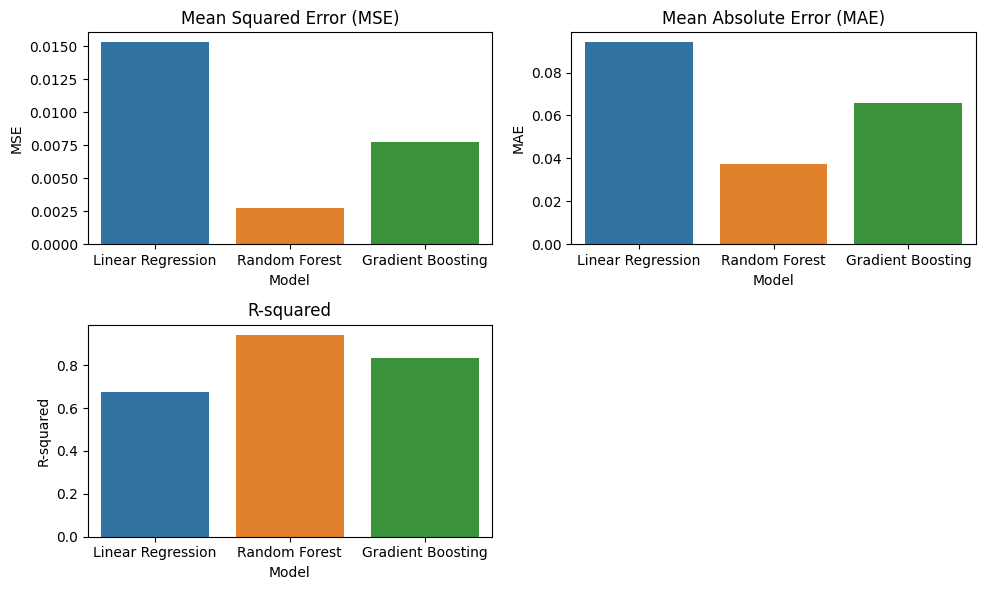

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Mean Squared Error (MSE)')

plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='MAE', data=results)
plt.title('Mean Absolute Error (MAE)')

plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='R-squared', data=results)
plt.title('R-squared')

plt.tight_layout()
plt.show()


## Create a Prediction

In [124]:

pred_subset = X_test.iloc[5:10].copy()

pred_dict = {'y_true': y_test.iloc[5:10]}

model_dict = {
    'Linear Regression': linear_reg_model,
    'Random Forest': random_forest_model,
    'Gradient Boosting': gradient_boosting_model
}
for name, model in model_dict.items():
    pred_dict['pred_' + name] = model.predict(pred_subset).round(1)


prediction_df = pd.DataFrame(pred_dict)
prediction_df


,y_true,pred_Linear Regression,pred_Random Forest,pred_Gradient Boosting
20,0.952381,0.5,0.8,0.7
21,0.942857,0.6,0.9,0.8
22,0.938095,0.6,0.8,0.6
23,0.938095,0.6,0.8,0.7
24,0.928571,0.7,0.9,0.8
